In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
from random import randint
import sys
from numpy import *

file = "DataSets/microarray-gene-expression-cancer-data/Gordon-2002_LungCancer.xlsx"
data_frame = pd.read_excel(file)
print(data_frame)

           meso42  meso51   meso2  meso82 meso212  meso74  meso67  meso57  \
NaN           MPM     MPM     MPM     MPM     MPM     MPM     MPM     MPM   
1006_at        10      71    11.3    24.6    22.8      10    19.3    20.7   
1014_at        82   133.9    60.7    85.1    49.9   108.2    74.2    38.4   
1042_at    1481.1    82.6   796.8    13.5   561.8  1209.3  1102.5  1895.5   
1047_s_at   220.3    74.5   298.3    26.6    85.9    40.3   196.8     228   
1051_g_at    34.6    30.1    42.6    50.3    48.5      20    44.7      10   
1057_at     148.4  1271.7    35.9    45.9   272.9    63.9    98.6      10   
1061_at      59.2      10    53.4      78    20.7    41.8   108.2    14.8   
1067_at        10    93.4    36.5    36.4      35    89.1      10    54.5   
1069_at      19.6      10    61.2      10      10      10    11.8      10   
1070_at      43.2    71.5   130.3    18.7    68.2   114.1    22.4    69.4   
1079_g_at    30.5      10    10.8    93.2    77.5      10    51.1    26.2   

In [3]:
data_values = data_frame.values[1:]
print(data_values)

# y = data_frame.values[0:][0]
# print(y)

[[10 71 11.3 ... 17.5 47.8 47.1]
 [82 133.9 60.7 ... 54.2 10 61.2]
 [1481.1 82.6 796.8 ... 68.7 10 45.7]
 ...
 [115.2 56.1 76.3 ... 45.4 124.2 116]
 [12.6 25.1 10 ... 49.5 304.2 345.2]
 [77.4 47.4 36.3 ... 34.3 27.1 27]]


In [4]:
features = list(data_frame)
lb = list(set(features))
feature = {}
for i in range(len(lb)):
    feature[lb[i]] = i
    
print(len(features))

181


In [19]:
X = data_values - data_values.mean(0)
print(X)

[[-94.59077490774901 -53.05953259532588 -102.52484624846238 ...
  -108.17521525215261 -49.41685116851171 -79.90073800737977]
 [-22.590774907749008 9.84046740467413 -53.124846248462376 ...
  -71.47521525215261 -87.21685116851171 -65.80073800737978]
 [1376.509225092251 -41.45953259532588 682.9751537515376 ...
  -56.97521525215261 -87.21685116851171 -81.30073800737978]
 ...
 [10.609225092250995 -67.95953259532587 -37.52484624846238 ...
  -80.2752152521526 26.983148831488293 -11.00073800737978]
 [-91.99077490774901 -98.95953259532587 -103.82484624846238 ...
  -76.17521525215261 206.98314883148828 218.19926199262022]
 [-27.190774907749002 -76.65953259532589 -77.52484624846238 ...
  -91.37521525215261 -70.11685116851172 -100.00073800737978]]


In [5]:
# computing covariance matrix
S  = (1/(X.shape[0]))*X.T.dot(X)
S  = np.array(S, dtype = float)
print(S)

[[ 48742.4506652   47705.56924538  41955.65086267 ...  18111.62095832
    3186.04561671  14418.89831554]
 [ 47705.56924538 179529.53081011  61331.58864384 ...  25903.40584819
    5931.36894761  27361.56058337]
 [ 41955.65086267  61331.58864384  81345.42795585 ...  24836.01803278
    4427.0279208   20209.02066432]
 ...
 [ 18111.62095832  25903.40584819  24836.01803278 ...  91926.83566493
    8997.98364028  67147.08642051]
 [  3186.04561671   5931.36894761   4427.0279208  ...   8997.98364028
   38034.79145035  29118.95820405]
 [ 14418.89831554  27361.56058337  20209.02066432 ...  67147.08642051
   29118.95820405 106537.60788383]]


In [ ]:
# import sys
# !conda install --yes --prefix {sys.prefix} plotly

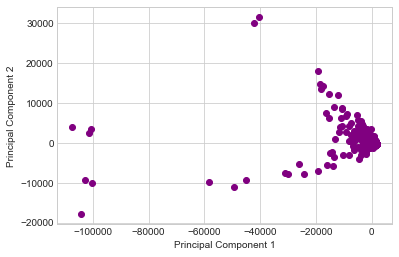

In [10]:
eigen_vals, eigen_vecs = np.linalg.eig(S)

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort()
eigen_pairs.reverse()

matrix_w = np.hstack((eigen_pairs[0][1].reshape(181,1),
                     eigen_pairs[1][1].reshape(181,1)))

Y = X.dot(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.scatter(Y[:,0], Y[:,1], c='purple')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()